In [1]:
from hypermolecule_class import Hypermolecule
os.chdir(r'C:\Users\ehrma\Desktop\Coding\TSCoDe\Resources\bulk')
# test = Hypermolecule('10-deacetylbaccatin_iii.xyz')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
OHs = [4,6,7,3]

In [8]:
from cclib.io import ccread
data = ccread('10-deacetylbaccatin_iii.xyz')
d = {4:' - reacts 1st',
     6:' - reacts 2nd',
     7:' - reacts 3rd',
     3:' - reacts 4th'}
def integral_steric_index(coords, index, thresh):
    '''
    '''
    distances = np.array([np.linalg.norm(coords[index]-coords[i]) for i in range(len(coords))])
    distances = np.sort(distances)
    distances = distances[distances < thresh]
    inv_distances = thresh-distances

    integral = np.sum([(distances[i]-distances[i-1])/2 + distances[i-1] for i in range(1,len(distances))])
    return distances, np.sum(inv_distances)

integral_steric_index(data.atomcoords[0], 11, 5)

(array([0.        , 1.41819711, 1.53097735, 1.53839948, 1.55129976,
        2.06783084, 2.12887947, 2.23494735, 2.28408267, 2.3018228 ,
        2.32283108, 2.57618605, 2.57842347, 2.62328046, 2.64974541,
        2.89382093, 2.91908947, 3.01780288, 3.03261016, 3.06172608,
        3.17283878, 3.27941149, 3.29593321, 3.36146762, 3.50266027,
        3.52280314, 3.53910793, 3.75069723, 3.84775652, 3.89898818,
        3.92960321, 3.93150151, 3.96984467, 3.98676963, 3.98916183,
        4.02617103, 4.17945823, 4.25404174, 4.27110845, 4.37757567,
        4.38683387, 4.40298433, 4.40943204, 4.43785235, 4.52682934,
        4.58941649, 4.68616048, 4.75628297, 4.7881781 , 4.82876777,
        4.89766009, 4.97702496]),
 83.49372408291067)

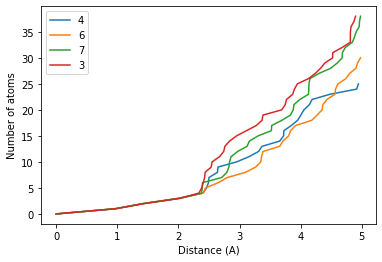

In [9]:
fig = plt.figure()
for index in OHs:
    x,_ = integral_steric_index(data.atomcoords[0], index, 5)
    plot = plt.plot(x, range(len(x)), label=index)
plt.legend()
plt.xlabel('Distance (A)')
plt.ylabel('Number of atoms')
plt.show()

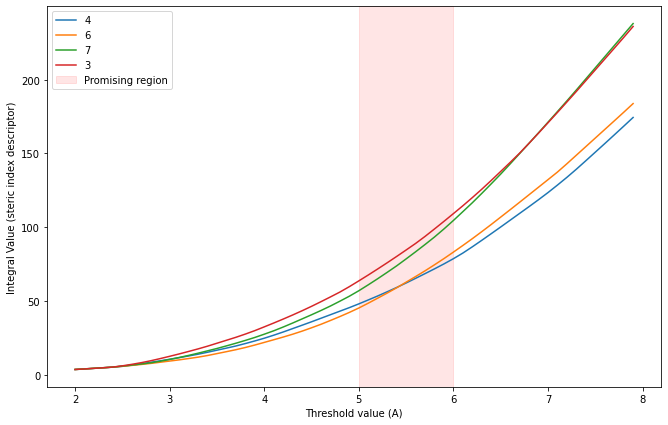

In [10]:
step = 0.1
range_ = np.arange(2,8,step)
# 1 for a smoother graph, 0.1 for a more detailed one

fig = plt.figure(figsize=(11,7))
for index in OHs:
    y = [integral_steric_index(data.atomcoords[0], index, thresh=thresh)[1] for thresh in range_]
    plot = plt.plot(range_, y, label=index)
plt.ylabel('Integral Value (steric index descriptor)')
plt.xlabel('Threshold value (A)')
plt.axvspan(5, 6, color='red', alpha=0.1, label='Promising region')
plt.legend()
plt.show()

Experimental reactivity order is **4,6,7,3**

Predicted order is correct for threshold values of about 4-5 angstroms, with more uncertainty for the least reactive centers.

Indeed, only the most reactive OH will react, and the resulting molecule may have a different score for each remaining OH

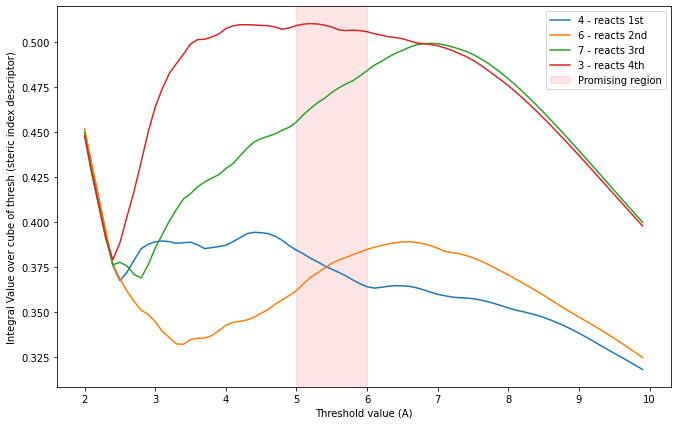

In [11]:
step = 0.1
range_ = np.arange(2,10,step)
# 1 for a smoother graph, 0.1 for a more detailed one

fig = plt.figure(figsize=(11,7))
for index in OHs:
    y = [integral_steric_index(data.atomcoords[0], index, thresh=thresh)[1]/thresh**3 for thresh in range_]
    l = str(index) + d[index]
    plot = plt.plot(range_, y, label=l)
plt.ylabel('Integral Value over cube of thresh (steric index descriptor)')
plt.xlabel('Threshold value (A)')
plt.axvspan(5, 6, color='red', alpha=0.1, label='Promising region')
plt.legend()
plt.show()